## Technical Exercise for Data Scientist Candidates

##### Author: Wenli Zhang
##### Date: Aug 2021

## Content

1. [Import libraries](#libraries)
1. [Question List](#Question_List)


## 1. Import libraries

<a id='libraries'></a>

In [20]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from scipy.sparse import csr_matrix

import nltk
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA


# Reports
import plotly
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.express as px
#import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "svg" # for plotly report to show as image in github

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wzhang\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. Question List

<a id='Question_List'></a>


1. [Rank top 3 Breweries which produce the strongest beers?](#Q1)
1. [Which year did beers enjoy the highest ratings?](#Q2)
1. [Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?](#Q3)
1. [If you were to recommend 3 beers to your friends based on this data which ones will you recommend?](#Q4)
1. [Which Beer style seems to be the favorite based on reviews written by users?](#Q5)
1. [How does written review compare to overall review score for the beer styles?](#Q6)
1. [How do find similar beer drinkers by using written reviews only? ](#Q7)

In [2]:
dfbeer=pd.read_csv('BeerDataScienceProject.csv',encoding = "ISO-8859-1")
dfbeer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [3]:
dfbeer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [4]:
dfbeer.describe(include='all')

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
count,508590.000000,528870.000000,528870.000000,528870,528870,528870.000000,528870.000000,528870.000000,528870.000000,528755,528870.000000,528751,5.288700e+05
unique,NaN,NaN,NaN,18339,104,NaN,NaN,NaN,NaN,22800,NaN,528371,NaN
top,NaN,NaN,NaN,Sierra Nevada Celebration Ale,American IPA,NaN,NaN,NaN,NaN,northyorksammy,NaN,#NAME?,NaN
freq,NaN,NaN,NaN,3000,43369,NaN,NaN,NaN,NaN,1858,NaN,92,NaN
mean,7.017442,22098.466016,2598.423429,NaN,NaN,3.864522,3.758926,3.833197,3.765993,NaN,3.817350,NaN,1.224885e+09
std,2.204460,22158.284352,5281.805350,NaN,NaN,0.604010,0.685335,0.709962,0.669018,NaN,0.718903,NaN,7.605600e+07
min,0.010000,3.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,NaN,8.843904e+08
25%,5.300000,1745.000000,132.000000,NaN,NaN,3.500000,3.500000,3.500000,3.500000,NaN,3.500000,NaN,1.174613e+09
50%,6.500000,14368.000000,394.000000,NaN,NaN,4.000000,4.000000,4.000000,4.000000,NaN,4.000000,NaN,1.240366e+09
75%,8.500000,40528.000000,1475.000000,NaN,NaN,4.000000,4.000000,4.500000,4.000000,NaN,4.500000,NaN,1.288560e+09


In [ ]:
# Key information after data inspection:
# total record count:528870
# beer_style: 104 
# user: 22800 

In [5]:
# get year from utcfromtimestamp
dfbeer['review_year'] = dfbeer.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)
dfbeer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010


In [6]:
#check null value
dfbeer.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
review_year               0
dtype: int64

In [7]:
# Since null counts for review_profileName and review_text are in small percentage, and both are needed for questions asked, so simply drop rows involved
dfbeer = dfbeer[dfbeer['review_profileName'].notna() & dfbeer['review_text'].notna()]
dfbeer.shape

(528636, 14)

In [8]:
# There are multiple entries by same user for same beer name, keep only the most recent entry
dfbeer_dup=dfbeer[dfbeer.groupby(['beer_style','beer_name'])['review_time'].transform('count') > 1]
dfbeer_dup.shape

(522273, 14)

In [9]:
# Sort data by review_time descending; keep the first in each unique'review_profileName' + 'beer_name'
dfbeer = dfbeer.sort_values('review_time', ascending=False)
dfbeer = dfbeer.drop_duplicates(subset= ['review_profileName','beer_name'], keep='first')
dfbeer.shape

(522701, 14)

### 1. Rank top 3 Breweries which produce the strongest beers?
<a id='Q1'></a>

### 2. Which year did beers enjoy the highest ratings?
<a id='Q2'></a>

### 3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
<a id='Q3'></a>

### 4. Which year did beers enjoy the highest ratings?
<a id='Q4'></a>

### 5. Which Beer style seems to be the favorite based on reviews written by users?
<a id='Q5'></a>

### 6. How does written review compare to overall review score for the beer styles?
<a id='Q6'></a>

### 7. How to find similar beer drinkers by using written reviews only?
<a id='Q7'></a>

In [10]:
def clean_text(text):
   # text pre-processing

    text = text.lower()
    
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"\'t", " not", text)
    
    #Spelling correction
    text = TextBlob(text).correct()
    
    # Only keep letters
    #skip this step since it doesn't make difference to the sentimental analysis method used
    
    # Lemmatization
    # can be time consuming
    #skip this step since it doesn't make difference to the sentimental analysis method used
      
    # Remove stop words
    # can be time consuming
    #skip this step since it doesn't make difference to the sentimental analysis method used
    return text

In [11]:
#dfbeer['review_text_clean']=dfbeer['review_text'].apply(lambda text:clean_text(text))
dfbeer['review_text_clean']=dfbeer['review_text']

In [101]:
# Using TextBlob to calculate sentiment polarity in the range of [-1,1]
# 1 = positive sentiment and -1 =negative sentiment
dfbeer['review_text_senti'] = dfbeer['review_text_clean'].apply(lambda text: TextBlob(text).sentiment.polarity)
intensityanalyzer = SentimentIntensityAnalyzer()
#dfbeer['review_text_senti'] = dfbeer['review_text_clean'].apply(lambda text: intensityanalyzer.polarity_scores(text)['compound'])


In [102]:
# If a user rated more than one beer names within one beer_style, use the mean value
senti_matrix = dfbeer.groupby(['review_profileName','beer_style'])['review_text_senti'].mean().unstack()

In [103]:
senti_matrix.head()

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profileName,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,0.147527,NaN,0.169634,NaN,NaN,NaN,NaN,0.091440,...,NaN,NaN,NaN,NaN,0.162071,NaN,NaN,NaN,NaN,0.264074
03SVTCobra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,0.196402,NaN,0.047833,0.20899,NaN,NaN,NaN,0.171955,...,NaN,NaN,NaN,0.259492,0.232556,0.285185,0.111205,0.006852,NaN,NaN
0runkp0s,NaN,-0.023611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# There are 55 beer drinkers having sentiment.polarity=0 based on their review_text. Since this is 0.2% of total beer drinkers, 0 is not handled before making senti_matrix a sparse.csr_matrix 
senti_matrix[(senti_matrix==0).sum(axis=1)>0]

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profileName,,,,,,,,,,,,,,,,,,,,,
AlexF,NaN,NaN,NaN,NaN,0.235198,NaN,0.280856,0.117330,NaN,NaN,...,0.175919,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,-0.150000
Bajasith,NaN,NaN,0.216139,NaN,NaN,NaN,0.167467,0.000000,NaN,0.100000,...,NaN,0.000183,NaN,NaN,NaN,NaN,0.190278,NaN,NaN,0.032414
BaronBeerGoggles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beer4Baltimore,NaN,NaN,0.071905,NaN,0.000000,0.112885,0.084259,NaN,NaN,0.057658,...,0.219583,NaN,NaN,NaN,0.151902,NaN,NaN,NaN,0.268452,0.044048
BenH1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BigJTrucker,NaN,0.009214,0.286280,NaN,0.205299,NaN,NaN,0.166667,NaN,0.228478,...,0.102500,NaN,NaN,0.279861,0.224862,NaN,NaN,NaN,0.139568,0.174211
BoozySmurf,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cavalier92,0.378571,NaN,0.000000,-0.030952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.315580,NaN,NaN,NaN,NaN,NaN
DaleMcMutt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Replace NaN with 0 first, then convert it to sparse.csr_matrix, where 0 values are ignored
senti_matrix=senti_matrix.fillna(0)
sparsem = csr_matrix(senti_matrix)
print("Sparse matrix: \n",sparsem )

Sparse matrix: 
   (0, 2)	0.14752711640211638
  (0, 4)	0.1696338383838384
  (0, 9)	0.0914400806308701
  (0, 10)	0.23076923076923073
  (0, 11)	0.164152862933589
  (0, 12)	0.20608971870520787
  (0, 17)	0.1388888888888889
  (0, 19)	0.11198509711794738
  (0, 20)	0.0946049532478104
  (0, 22)	0.16350000000000003
  (0, 25)	0.11176948051948052
  (0, 29)	0.3755
  (0, 58)	0.1612561728395062
  (0, 60)	0.23551607123035695
  (0, 74)	0.2002450980392157
  (0, 84)	0.1090807194754563
  (0, 89)	0.2285757575757576
  (0, 92)	0.22111685463659148
  (0, 98)	0.16207070707070703
  (0, 103)	0.2640740740740741
  (1, 49)	0.19819548872180454
  (1, 76)	0.11016666666666666
  (1, 93)	0.2394871794871795
  (2, 14)	0.2549444444444444
  (3, 2)	0.19640151515151513
  :	:
  (22785, 15)	0.0878720238095238
  (22785, 16)	0.08660841473341471
  (22785, 17)	0.21827976190476195
  (22785, 39)	0.1919871794871795
  (22785, 49)	0.20946969696969697
  (22785, 58)	0.2204545454545455
  (22785, 60)	0.09073809523809526
  (22785, 61)	0.27686

In [120]:
# SpectralClustering is chosen over K-Means and DBScan since overall it handles high dimensional data and sparse data better
# I used n_clusters=20, didn't find an easy way to do elbow anaylysis using inertia like one in K-Means. 
# My understanding of the reason is that both SpectralClustering and DBScan are not centriod based
# Not sure how to choose best n_clusters?
clustering = SpectralClustering(n_clusters=20,assign_labels="discretize", random_state=0).fit(sparsem)
clustering.labels_
# Not sure if this is correct - index order is preserved?
senti_matrix['cluster']=clustering.labels_

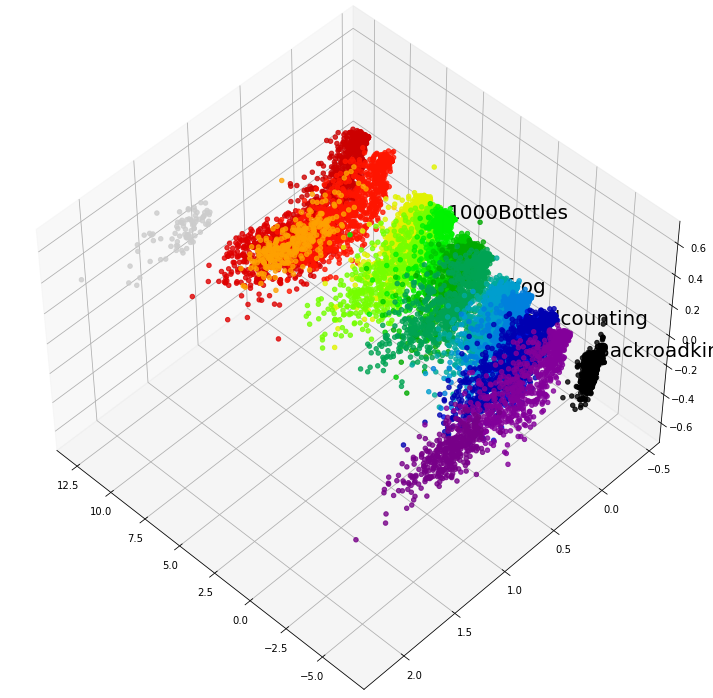

In [137]:
# Not sure if PCA is correctly used here since it doesn't take the sparse matrix sparsem, has to use senti_matrix, where null are filled with 0
# if PCA can't be used, not sure what other plotting options to present the clustering visually?
# last choice could be to display the user list for each cluster in a table

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

pca = PCA(n_components=3)
pca.fit(senti_matrix)
X = pca.transform(senti_matrix)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=clustering.labels_, cmap=plt.cm.nipy_spectral,alpha=0.8)

# label beer drinkers to see if they are similar
ax.text(X[701, 0], X[701, 1], X[701, 2], senti_matrix.index[701], size=20, zorder=1,   color='k') 
ax.text(X[114, 0], X[114, 1], X[114, 2], senti_matrix.index[114], size=20, zorder=1,   color='k') 
ax.text(X[91, 0], X[91, 1], X[91, 2], senti_matrix.index[91], size=20, zorder=1,   color='k') 
ax.text(X[6, 0], X[6, 1], X[6, 2], senti_matrix.index[6], size=20, zorder=1,   color='k') 

plt.show()


In [141]:
# Similar beer drinkers can be reviewed by providing a cluster id
senti_matrix_list = senti_matrix.reset_index()
senti_matrix_list[senti_matrix_list['cluster']==11]['review_profileName']

6            1000Bottles
8              100floods
26             13aphomet
76             2roosters
99       40oztofreedom89
              ...       
22409          winters19
22501        wryepicures
22589           xxnite88
22614            yankiac
22716       zassenhausen
Name: review_profileName, Length: 689, dtype: object